In [3]:
import os
import pandas as pd
import re
def extractData(dir):
    namelist = os.listdir(dir)
    print(namelist)
    data = []

    for filename in namelist:
        if filename.endswith('.txt'):
            title = filename.replace('.txt', '')
            with open(os.path.join(dir, filename), 'r') as file:
                lines = file.readlines()
                psnr_match = re.search(r'\d+(\.\d+)?', lines[0].strip())
                outlier_match = re.search(r'\d+', lines[1].strip())
                if psnr_match and outlier_match:
                    psnr = float(psnr_match.group())
                    outlier = int(outlier_match.group())
                    data.append([title, psnr, outlier])

    df = pd.DataFrame(data, columns=['image', 'PSNR', 'Outlier'])
    return df

In [4]:
df1 = extractData('processing_data')
df1

['Baboon.txt', 'house.txt', 'Jet.txt', 'Lena.txt', 'Peppers.txt', 'Sailboat.txt', 'Splash.txt', 'Tiffany.txt']


,image,PSNR,Outlier
0,Baboon,36.061124,64
1,house,36.040565,508
2,Jet,35.983703,270
3,Lena,36.022217,1
4,Peppers,35.744825,11294
5,Sailboat,36.023769,749
6,Splash,36.105943,7429
7,Tiffany,33.534476,20475


In [24]:
df2 = extractData('appm')
df2

['Baboon.txt', 'house.txt', 'Jet.txt', 'Lena.txt', 'Peppers.txt', 'Sailboat.txt', 'Splash.txt', 'Tiffany.txt']


,image,PSNR,Outlier
0,Baboon,36.126215,12
1,house,36.145914,561
2,Jet,36.065758,257
3,Lena,36.077714,1
4,Peppers,35.950519,8621
5,Sailboat,36.186683,797
6,Splash,36.124299,7570
7,Tiffany,33.168796,20310


In [25]:
df3 = extractData('srm(origin)')
df3

['Baboon.txt', 'house.txt', 'Jet.txt', 'Lena.txt', 'Peppers.txt', 'Sailboat.txt', 'Splash.txt', 'Tiffany.txt']


,image,PSNR,Outlier
0,Baboon,36.040865,102
1,house,36.152776,468
2,Jet,35.840960,176
3,Lena,35.996528,0
4,Peppers,35.823662,9945
5,Sailboat,36.024831,750
6,Splash,35.882654,8357
7,Tiffany,34.105774,16733


In [26]:
df_combined = pd.concat([df1, df2, df3],axis=1 ,ignore_index=True)
df_combined

,0,1,2,3,4,5,6,7,8
0,Baboon,36.061124,64,Baboon,36.126215,12,Baboon,36.040865,102
1,house,36.040565,508,house,36.145914,561,house,36.152776,468
2,Jet,35.983703,270,Jet,36.065758,257,Jet,35.840960,176
3,Lena,36.022217,1,Lena,36.077714,1,Lena,35.996528,0
4,Peppers,35.744825,11294,Peppers,35.950519,8621,Peppers,35.823662,9945
5,Sailboat,36.023769,749,Sailboat,36.186683,797,Sailboat,36.024831,750
6,Splash,36.105943,7429,Splash,36.124299,7570,Splash,35.882654,8357
7,Tiffany,33.534476,20475,Tiffany,33.168796,20310,Tiffany,34.105774,16733


In [28]:
df_combined.to_csv('result.csv', index=False)

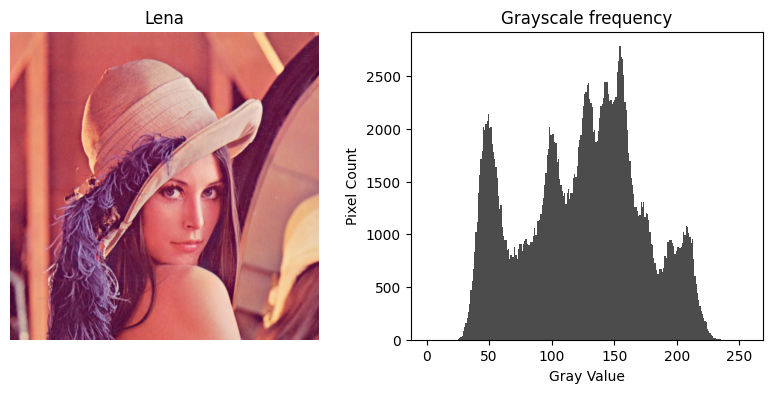

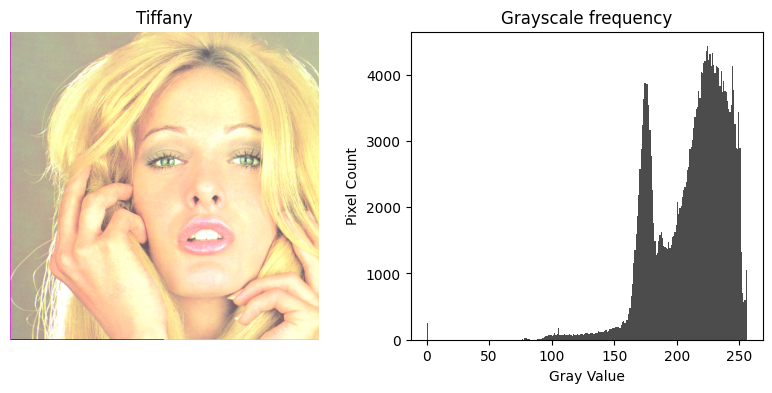

In [9]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 
import os
imagelist = os.listdir('image')

def plot_histogram(image_name):
    path = 'image/' + image_name
    I = io.imread(path)
    
    # 將 RGB 轉換為灰階
    gray_image = np.dot(I[...,:3], [0.299, 0.587, 0.114])

    # 移除副檔名
    image_base_name = os.path.splitext(image_name)[0]

    # 創建子圖
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # 左側顯示原始圖片
    axs[0].imshow(I)
    axs[0].axis('off')  # 隱藏座標軸
    axs[0].set_title(f'{image_base_name}')

    # 右側顯示灰階直方圖
    axs[1].hist(gray_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    axs[1].set_title(f'Grayscale frequency')
    axs[1].set_xlabel('Gray Value')
    axs[1].set_ylabel('Pixel Count')

for image_name in ['Lena.tiff', 'Tiffany.tiff']:
    plot_histogram(image_name)